# Convert  ".root" data into ".pkl"

In [1]:
%pylab inline

import uproot
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### Carico il Monte Carlo e i dati

In [2]:
df_MC = uproot.open('~/data/hyper2body_data/HyperTree_MC_Signal.root')['HyperTree_MC_Signal'].pandas.df()

In [3]:
df_data = uproot.open('~/data/hyper2body_data/HyperTree_Data.root')['HyperTree_Data'].pandas.df()

In [4]:
df_data.head()

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec,Centrality
entry,,,,,,,,,,,,,,,,
0,1.547667,-1.00,42.901505,2.989854,0.790592,0.991963,0.0,0.198183,1.358050,0.44,0.256,0.256,133.0,1.0,72.552902,2.85
1,1.590310,-1.25,58.802124,2.984586,0.771460,0.996810,0.0,0.193549,1.408496,0.12,0.256,0.256,138.0,0.0,98.125320,8.85
2,1.268124,-1.25,34.876041,3.091097,0.855789,0.996040,0.0,0.140469,1.408496,0.76,0.256,0.256,138.0,-1.0,47.493088,8.85
3,1.566654,-1.25,23.185598,2.973178,0.785518,0.984973,0.0,0.159276,1.408496,0.12,0.256,0.149,138.0,1.5,38.409828,8.85
4,1.423597,1.25,25.090576,3.012177,0.933165,0.995859,0.0,0.109908,1.373186,0.37,0.256,0.256,49.0,-3.0,35.792778,10.95


In [5]:
df_MC.head()

,V0pt,TPCnSigmaHe3,DistOverP,InvMass,ArmenterosAlpha,V0CosPA,V0Chi2,PiProngPt,He3ProngPt,ProngsDCA,He3ProngPvDCA,PiProngPvDCA,NpidClustersHe3,TPCnSigmaPi,Lrec,Centrality
entry,,,,,,,,,,,,,,,,
0,1.801913,0.500,3.079487,2.992206,0.848579,0.997848,0.0,0.194784,1.619431,0.77,1.000000,1.0,120.0,0.125,6.497778,4.65
1,2.850354,0.625,5.009816,2.992606,-0.865971,0.999918,0.0,0.193109,2.667301,0.58,0.667969,1.0,124.0,1.125,14.319689,4.65
2,3.941775,-0.500,2.213483,2.993389,0.799560,0.999990,0.0,0.408496,3.537629,0.00,0.156250,1.0,127.0,-1.000,9.055533,1.35
3,5.601911,0.250,3.571688,2.992445,-0.892057,0.999999,0.0,0.276571,5.337098,0.40,0.519531,1.0,145.0,-0.375,22.357100,7.55
4,2.040387,0.625,6.642829,2.986990,-0.794670,0.999532,0.0,0.215732,1.830621,0.68,0.910156,1.0,87.0,-0.375,13.555475,7.15


## Provo a vedere cosa succede usando i tagli standard

In [6]:
df_data=df_data.astype('float')

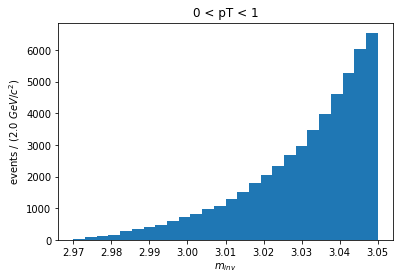

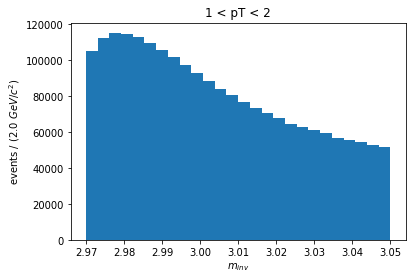

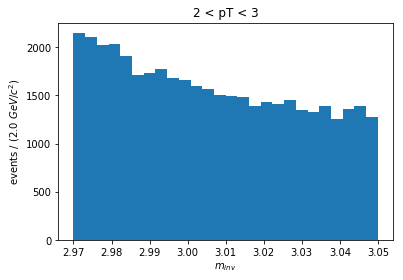

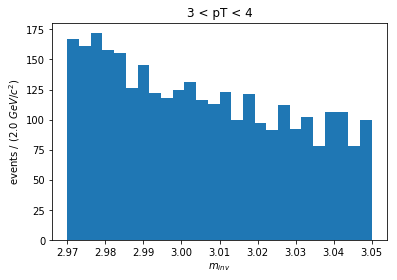

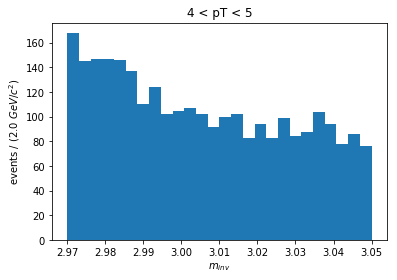

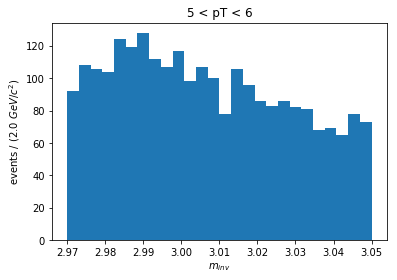

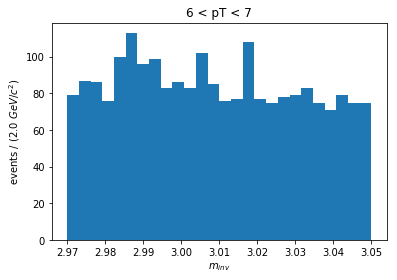

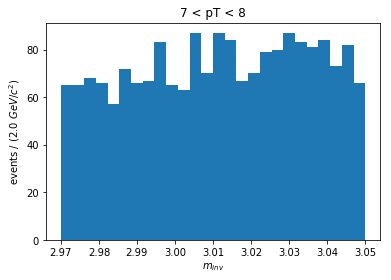

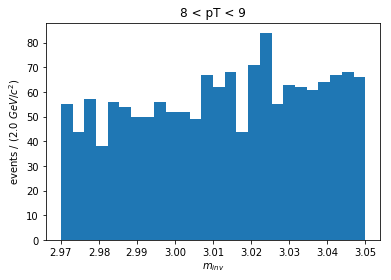

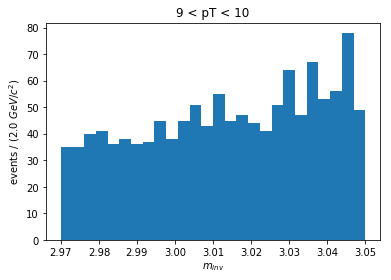

In [18]:
for i in range(10):
    plt.figure();
    hyper_df=df_data.query('V0pt>=@i and V0pt<@i+1 and Centrality>10.0 and Centrality<=40.0 ')
    n,bins,_=plt.hist(hyper_df['InvMass'],bins=26,range=[2.97,3.05],histtype='barstacked')
    title('{} < pT < {}'.format(i,i+1))
    xlabel('$m_{inv}$')
    ylabel('events / $(2.0\ GeV/\it{c}^2)$')

# Creo e salvo pandas per ML

In [10]:
df_Bkg = df_data.query('(InvMass<2.98 or InvMass>3.005) and V0pt<=10')
df_Bkg=df_Bkg[0:10*len(df_MC)]
df_Bkg['y']=0
df_MC['y']=1

In [15]:
df_ML= pd.concat([df_MC,df_Bkg])
df_ML.to_pickle('~/data/hyper2body_data/df_ML.pkl')

In [16]:
df_Sig_data=df_data.query('2.960<InvMass<3.050 and V0pt<=10')

In [17]:
df_Sig_data.to_pickle('~/data/hyper2body_data/df_Sig_data.pkl')